In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_enriched_features = "data/processed_data/hourly_solar_copernicus_data.feather"
file_weather_data = "data/processed_data/hourly_weather_data.feather"
file_solar_date="data/processed_data/daily_solar_data.feather"


In [4]:
df_enriched_features=pd.read_feather(file_enriched_features)
df_weather_data = pd.read_feather(file_weather_data)
df_solar_data = pd.read_feather(file_solar_date)

In [5]:
print(f'df_enriched_features columns {df_enriched_features.columns.to_list()}')
print(f'df_weather_data {df_weather_data.columns.to_list()}')
print(f'df_solar_data {df_solar_data.columns.to_list()}')

df_enriched_features columns ['DateTime', '# Observation period', 'TOA', 'Clear sky GHI', 'Clear sky BHI', 'Clear sky DHI', 'Clear sky BNI', 'GHI', 'BHI', 'DHI', 'BNI', 'Reliability,', 'Time', 'Date']
df_weather_data ['DateTime', 'Temperature(C)', 'Humidity(%)', 'Solar Radiation(W/m^2)', 'Condition Code']
df_solar_data ['Date', 'Number', 'Time', 'Working State', 'PV(W)', 'Battery(W)', 'Grid(W)', 'Load(W)', 'SOC(%)', 'Total_Yield(kWh)', 'Source_File', 'DateTime']


In [41]:
# merge all the 3 dataframes on DateTime
df_merge = df_solar_data.merge(right=df_weather_data,how='inner',left_on='DateTime',right_on='DateTime')
df_merge = df_merge.merge(right=df_enriched_features,how='inner',left_on='DateTime',right_on='DateTime')
# convert DateTime to datetime
df_merge['DateTime'] = pd.to_datetime(df_merge['DateTime'])
df_merge['Month_Sin'] = np.sin(2 * np.pi * (df_merge['DateTime'].dt.month - 1) / 12)
df_merge['DayOfYear_Sin'] = np.sin(2 * np.pi * (df_merge['DateTime'].dt.dayofyear - 1) / 365)
df_merge['HourOfDay_Sin'] = np.sin(2 * np.pi * (df_merge['DateTime'].dt.hour) / 24)
print(f"df_merge  {df_merge.columns.to_list()}")
print(f"df_merge  {df_merge.shape}")
# summaries to an hourly level by taking mean of each hour
df_merge = df_merge.groupby('DateTime').mean().reset_index()
# add Date column
df_merge['Date_y'] = df_merge['DateTime'].dt.date

df_merge  ['Date_x', 'Number', 'Time_x', 'Working State', 'PV(W)', 'Battery(W)', 'Grid(W)', 'Load(W)', 'SOC(%)', 'Total_Yield(kWh)', 'Source_File', 'DateTime', 'Temperature(C)', 'Humidity(%)', 'Solar Radiation(W/m^2)', 'Condition Code', '# Observation period', 'TOA', 'Clear sky GHI', 'Clear sky BHI', 'Clear sky DHI', 'Clear sky BNI', 'GHI', 'BHI', 'DHI', 'BNI', 'Reliability,', 'Time_y', 'Date_y', 'Month_Sin', 'DayOfYear_Sin', 'HourOfDay_Sin']
df_merge  (59110, 32)


TypeError: agg function failed [how->mean,dtype->object]

Sunniest day: 2025-06-01 12:50:00


C:\Users\cw171001\AppData\Local\Temp\ipykernel_36836\4263852229.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


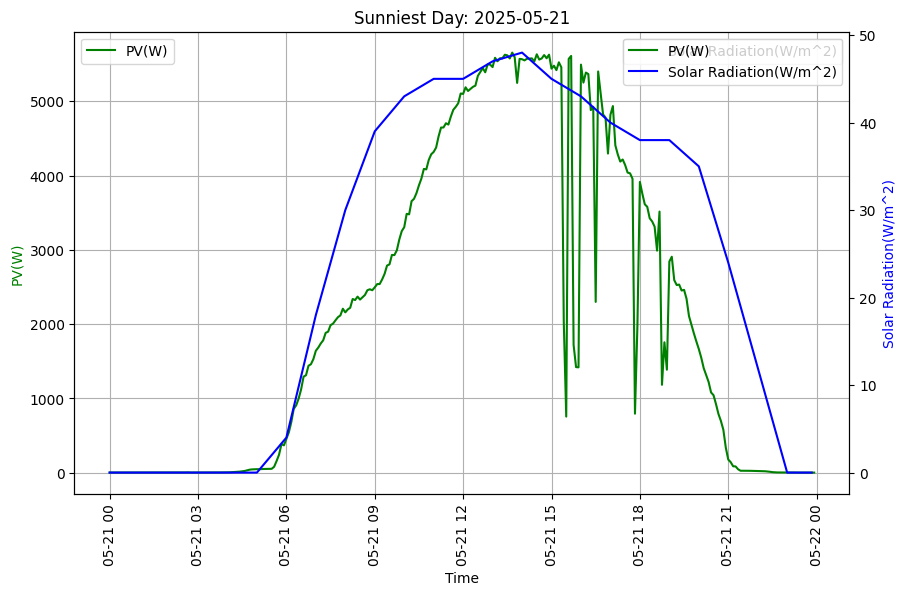

In [40]:
# find the sunniest day in df_salar_date - a day where PV(W) is maximum
import datetime
sunniest_day = df_solar_data.loc[df_solar_data['PV(W)'].idxmax()]['DateTime']
print(f"Sunniest day: {sunniest_day}")
sunniest_day = datetime.datetime(2025, 5, 21)  # manually set to June 21, 2025
df_solar_data_sunniest = df_solar_data[df_solar_data['DateTime'].dt.date == sunniest_day.date()]
df_weather_data_sunniest = df_weather_data[df_weather_data['DateTime'].dt.date == sunniest_day.date()]
df_enriched_features_sunniest = df_enriched_features[df_enriched_features['DateTime'].dt.date == sunniest_day.date()]
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
ax1.plot(df_solar_data_sunniest['DateTime'], df_solar_data_sunniest['PV(W)'], 'g-', label='PV(W)')
ax2.plot(df_weather_data_sunniest['DateTime'], df_weather_data_sunniest['Solar Radiation(W/m^2)'], 'b-', label='Solar Radiation(W/m^2)')
ax1.set_xlabel('Time')
ax1.set_ylabel('PV(W)', color='g')
ax2.set_ylabel('Solar Radiation(W/m^2)', color='b')
plt.title(f'Sunniest Day: {sunniest_day.date()}')
# rotate x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
                              
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
# place legend outside the plot
# set grid
ax1.grid()
#
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

In [ ]:
# find the sunniest day in df_salar_date - a day where PV(W) is maximum
import datetime
sunniest_day = df_solar_data.loc[df_solar_data['PV(W)'].idxmax()]['DateTime']
print(f"Sunniest day: {sunniest_day}")
sunniest_day = datetime.datetime(2025, 5, 21)  # manually set to June 21, 2025
df_solar_data_sunniest = df_solar_data[df_solar_data['DateTime'].dt.date == sunniest_day.date()]
df_weather_data_sunniest = df_weather_data[df_weather_data['DateTime'].dt.date == sunniest_day.date()]
df_enriched_features_sunniest = df_enriched_features[df_enriched_features['DateTime'].dt.date == sunniest_day.date()]
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
ax1.plot(df_solar_data_sunniest['DateTime'], df_solar_data_sunniest['PV(W)'], 'g-', label='PV(W)')
ax2.plot(df_weather_data_sunniest['DateTime'], df_weather_data_sunniest['Solar Radiation(W/m^2)'], 'b-', label='Solar Radiation(W/m^2)')
ax1.set_xlabel('Time')
ax1.set_ylabel('PV(W)', color='g')
ax2.set_ylabel('Solar Radiation(W/m^2)', color='b')
plt.title(f'Sunniest Day: {sunniest_day.date()}')
# rotate x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
                              
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
# place legend outside the plot
# set grid
ax1.grid()
#
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()